In [1]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score
import matplotlib.pyplot as pl
# Read student data
student_data = pd.read_csv("student-mat.csv", sep=';')

print ("Student data read successfully!")

Student data read successfully!


In [2]:
f = student_data['G1'] + student_data['G2'] + student_data['G3'] > 20

In [3]:

student_data = student_data.iloc[:,:-3]

#Calculate number of students
n_students = student_data.shape[0]
#Calculate number of features
n_features = student_data.shape[1]

In [4]:
n_students, n_features

(395, 30)

In [5]:
student_data['passed'] = f
# student_data['passed'] = student_data['passed'].astype(str)

mask = student_data['passed'].apply(type) != bool
d = {True: 'yes', False: 'no'}

student_data = student_data.where(mask, student_data.replace(d))

In [6]:
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [7]:
#Calculate passing students
n_passed = sum(student_data['passed'].str.lower()=='yes')
#Calculate failing students
n_failed = sum(student_data['passed'].str.lower()=='no')
#Calculate graduation rate
grad_rate = n_passed/n_students
# Print the results
print ("Total number of students: {}".format(n_students))
print ("Number of features: {}".format(n_features))
print ("Number of students who passed: {}".format(n_passed))
print ("Number of students who failed: {}".format(n_failed))
print ("Graduation rate of the class: {:.2f}%".format(grad_rate))
# Extract feature columns
feature_cols = list(student_data.columns[:-1])
# Extract target column 'passed'
target_col = student_data.columns[-1] 
# Show the list of columns
print ("Feature columns:\n{}".format(feature_cols))
print ("\nTarget column: {}".format(target_col))
# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]
# Show the feature information by printing the first five rows
print ("\nFeature values:")
print (X_all.head())

seed = 60

Total number of students: 395
Number of features: 30
Number of students who passed: 335
Number of students who failed: 60
Graduation rate of the class: 0.85%
Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     oth

In [22]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)
 
    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        # To better distinguish between the binary variables and the categorical varuables 
        if col_data.dtype == object :
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object :
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output


In [23]:
X_all = preprocess_features(X_all)
print ("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))
# Import any additional functionality you may need here
import random
#Set the number of training points
num_train = 300
# Set the number of testing points
num_test = X_all.shape[0] - num_train
#Shuffle and split the dataset into the number of training and testing points above
random.seed(1)
shuffled_index=list(range(0,X_all.shape[0])) #cannot do a=random.shuffle(a)
random.shuffle(shuffled_index)
X_train = X_all.iloc[shuffled_index[:num_train],]
X_test =  X_all.iloc[shuffled_index[num_train:],]
y_train = y_all.iloc[shuffled_index[:num_train]]
y_test = y_all.iloc[shuffled_index[num_train:]]
# Show the results of the split
print ("\n\nTraining set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))
X_all.head()

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


Training set has 300 samples.
Testing set has 95 samples.


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,1,0,1,0,18,0,1,1,0,1,...,1,0,0,4,3,4,1,1,3,6
1,1,0,1,0,17,0,1,1,0,0,...,1,1,0,5,3,3,1,1,3,4
2,1,0,1,0,15,0,1,0,1,0,...,1,1,0,4,3,2,2,3,3,10
3,1,0,1,0,15,0,1,1,0,0,...,1,1,1,3,2,2,1,1,5,2
4,1,0,1,0,16,0,1,1,0,0,...,1,0,0,4,3,2,1,2,5,4


In [10]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print ("Trained model in {:.4f} seconds".format(end - start))


In [11]:

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print ("Made predictions in {:.4f} seconds.".format(end - start))
    return f1_score(target.values, y_pred, pos_label='yes')



In [12]:

def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print ("F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train)))
    print ("F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test)))
    #Import the three supervised learning models from sklearn


In [13]:
# from sklearn import model_A
from sklearn.ensemble import RandomForestClassifier

# from sklearn import model_B
from sklearn.linear_model import SGDClassifier

# from skearln import model_C
from sklearn.svm import SVC

#Initialize the three models

clf_A = RandomForestClassifier(random_state=seed)
clf_B = SGDClassifier(random_state=seed)

clf_C = SVC(random_state=seed)


# Set up the training set sizes
X_train_100 = X_train[:100]
y_train_100 = y_train[:100]

X_train_200 = X_train[:200]
y_train_200 = y_train[:200]

X_train_300 = X_train[:300]
y_train_300 = y_train[:300]       
        

# Execute the 'train_predict' function for each classifier and each training set size
# train_predict(clf, X_train, y_train, X_test, y_test)
#clfs=[clf_A, clf_B, clf_C]
#for i in range(0, len(clfs)):
train_predict(clf_A,X_train_100, y_train_100, X_test, y_test)
train_predict(clf_A,X_train_200, y_train_200, X_test, y_test)
train_predict(clf_A,X_train_300, y_train_300, X_test, y_test)
print('\n')


train_predict(clf_B,X_train_100, y_train_100, X_test, y_test)
train_predict(clf_B,X_train_200, y_train_200, X_test, y_test)
train_predict(clf_B,X_train_300, y_train_300, X_test, y_test)
print('\n')

train_predict(clf_C,X_train_100, y_train_100, X_test, y_test)
train_predict(clf_C,X_train_200, y_train_200, X_test, y_test)
train_predict(clf_C,X_train_300, y_train_300, X_test, y_test)
print('\n')


Training a RandomForestClassifier using a training set size of 100. . .
Trained model in 0.0719 seconds
Made predictions in 0.0157 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.9205.
Training a RandomForestClassifier using a training set size of 200. . .
Trained model in 0.0789 seconds
Made predictions in 0.0156 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0189 seconds.
F1 score for test set: 0.9205.
Training a RandomForestClassifier using a training set size of 300. . .
Trained model in 0.0830 seconds
Made predictions in 0.0128 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0070 seconds.
F1 score for test set: 0.9318.


Training a SGDClassifier using a training set size of 100. . .
Trained model in 0.0020 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 0.9171.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.9205.
Training a SGDClassifier using a traini

In [14]:
# use plots to visualiza the results
def model_fit(clf, X_train, y_train, X_test, y_test):
    ''' Train the model using different size of the training samples. '''
    score_train=[]
    score_test=[]
    for i in range(1,4):
        X_train_temp=X_train[:i*100]
        y_train_temp=y_train[:i*100]
        train_predict(clf,X_train_temp, y_train_temp, X_test, y_test)
        score_train.append(predict_labels(clf, X_train_temp, y_train_temp))
        score_test.append(predict_labels(clf, X_test, y_test))
    
    
    a,=pl.plot([100,200,300], score_train, 'r-', label='training set')
    b,= pl.plot([100,200,300], score_test, 'b-', label='testing set')  
    pl.ylim([0.5,1.1])
    pl.title("F1 Score of {}".format((clf.__class__.__name__)))
    pl.legend(handles=[a, b])
    pl.show()
  

Training a RandomForestClassifier using a training set size of 100. . .
Trained model in 0.0855 seconds
Made predictions in 0.0000 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0157 seconds.
F1 score for test set: 0.9205.
Made predictions in 0.0151 seconds.
Made predictions in 0.0085 seconds.
Training a RandomForestClassifier using a training set size of 200. . .
Trained model in 0.0704 seconds
Made predictions in 0.0156 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0156 seconds.
F1 score for test set: 0.9205.
Made predictions in 0.0123 seconds.
Made predictions in 0.0080 seconds.
Training a RandomForestClassifier using a training set size of 300. . .
Trained model in 0.0856 seconds
Made predictions in 0.0090 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0070 seconds.
F1 score for test set: 0.9318.
Made predictions in 0.0080 seconds.
Made predictions in 0.0022 seconds.


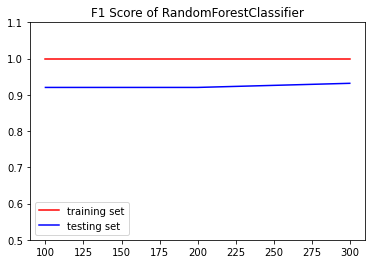

Training a SGDClassifier using a training set size of 100. . .
Trained model in 0.0020 seconds
Made predictions in 0.0020 seconds.
F1 score for training set: 0.9171.
Made predictions in 0.0020 seconds.
F1 score for test set: 0.9205.
Made predictions in 0.0010 seconds.
Made predictions in 0.0020 seconds.
Training a SGDClassifier using a training set size of 200. . .
Trained model in 0.0020 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 0.9371.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.9070.
Made predictions in 0.0010 seconds.
Made predictions in 0.0010 seconds.
Training a SGDClassifier using a training set size of 300. . .
Trained model in 0.0050 seconds
Made predictions in 0.0020 seconds.
F1 score for training set: 0.9189.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.8862.
Made predictions in 0.0020 seconds.
Made predictions in 0.0020 seconds.


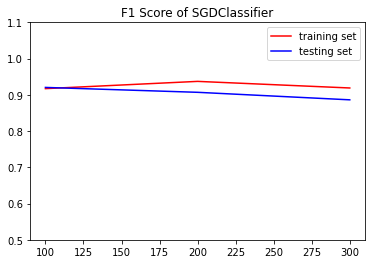

Training a SVC using a training set size of 100. . .
Trained model in 0.0074 seconds
Made predictions in 0.0030 seconds.
F1 score for training set: 0.9071.
Made predictions in 0.0030 seconds.
F1 score for test set: 0.9266.
Made predictions in 0.0020 seconds.
Made predictions in 0.0020 seconds.
Training a SVC using a training set size of 200. . .
Trained model in 0.0034 seconds
Made predictions in 0.0038 seconds.
F1 score for training set: 0.9071.
Made predictions in 0.0022 seconds.
F1 score for test set: 0.9266.
Made predictions in 0.0040 seconds.
Made predictions in 0.0028 seconds.
Training a SVC using a training set size of 300. . .
Trained model in 0.0058 seconds
Made predictions in 0.0050 seconds.
F1 score for training set: 0.9150.
Made predictions in 0.0030 seconds.
F1 score for test set: 0.9266.
Made predictions in 0.0050 seconds.
Made predictions in 0.0020 seconds.


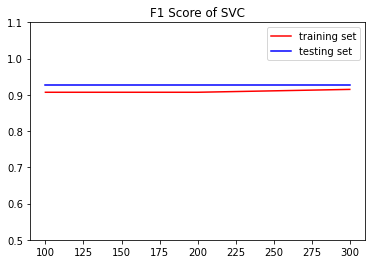

Training a RandomForestClassifier using a training set size of 100. . .
Trained model in 0.0952 seconds
Made predictions in 0.0080 seconds.
F1 score for training set: 0.9708.
Made predictions in 0.0070 seconds.
F1 score for test set: 0.9266.
Training a RandomForestClassifier using a training set size of 200. . .
Trained model in 0.0722 seconds
Made predictions in 0.0000 seconds.
F1 score for training set: 0.9486.
Made predictions in 0.0232 seconds.
F1 score for test set: 0.9266.
Training a RandomForestClassifier using a training set size of 300. . .
Trained model in 0.0747 seconds
Made predictions in 0.0198 seconds.
F1 score for training set: 0.9388.
Made predictions in 0.0090 seconds.
F1 score for test set: 0.9266.




In [15]:

model_fit(clf_A, X_train, y_train, X_test, y_test)
model_fit(clf_B, X_train, y_train, X_test, y_test)
model_fit(clf_C, X_train, y_train, X_test, y_test)

clf_rf=RandomForestClassifier(max_depth=5, random_state=seed)
train_predict(clf_rf,X_train_100, y_train_100, X_test, y_test)
train_predict(clf_rf,X_train_200, y_train_200, X_test, y_test)
train_predict(clf_rf,X_train_300, y_train_300, X_test, y_test)
print('\n')

In [16]:

# Import 'GridSearchCV' and 'make_scorer'
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import make_scorer

# Create the parameters list you wish to tune

# Initialize the classifier
clf = SGDClassifier(random_state=seed)


In [17]:

parameters = {
              'loss' : ['hinge', 'log', 'modified_huber'],
              'alpha' : [0.05,0.0495,0.0492,0.049,0.0498,0.0494],
              'max_iter' : [70]
             }


In [18]:
svc=SVC(kernel='linear') 

svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(f1_score(y_test, y_pred, pos_label='yes')))

Model accuracy score with default hyperparameters: 0.9195


In [19]:

# Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label='yes')

# Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, param_grid=parameters, scoring=f1_scorer)

# Fit the grid search object to the training data and find the optimal parameters
grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_


SGDClassifier(alpha=0.05, loss='log', max_iter=70, random_state=60)


In [21]:

print(clf)
# Report the final F1 score for training and testing after parameter tuning
print ("Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train)))
print ("Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test)))

SGDClassifier(alpha=0.05, loss='log', max_iter=70, random_state=60)
Made predictions in 0.0030 seconds.
Tuned model has a training F1 score of 0.9314.
Made predictions in 0.0026 seconds.
Tuned model has a testing F1 score of 0.9123.
